In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [7]:
import tensorflow as tf

In [8]:
from keras.models import Sequential  
from keras.layers import Dense
from keras.optimizers import Adam

In [9]:
from tensorflow.keras.callbacks import EarlyStopping

In [10]:
dataset = pd.read_csv('combined_data.dat', sep="\s+", header=None)
dataset.columns =["COMPACTNESS","CIRCULARITY","DISTANCE CIRCULARITY","RADIUS RATIO","PR.AXIS ASPECT RATIO",
                      "MAX.LENGTH ASPECT RATIO","SCATTER RATIO","ELONGATEDNESS","PR.AXIS RECTANGULARITY",
                       "MAX.LENGTH RECTANGULARITY","SCALED VARIANCE ALONG MAJOR AXIS","SCALED VARIANCE ALONG MINOR AXIS",
                      "SCALED RADIUS OF GYRATION","SKEWNESS ABOUT MAJOR AXIS","SKEWNESS ABOUT MINOR AXIS",
                      "KURTOSIS ABOUT MINOR AXIS","KURTOSIS ABOUT MAJOR AXIS","HOLLOWS RATIO","vehicle_type"]
dataset

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO,vehicle_type
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39,87,183,64,8,169,40,20,134,200,422,149,72,7,25,188,195,saab
842,89,46,84,163,66,11,159,43,20,159,173,368,176,72,1,20,186,197,van
843,106,54,101,222,67,12,222,30,25,173,228,721,200,70,3,4,187,201,saab
844,86,36,78,146,58,7,135,50,18,124,155,270,148,66,0,25,190,195,saab


In [11]:
# Get all the attributes
X = dataset.iloc[:, 0:18].values
y = dataset.iloc[:,18].values

In [12]:
encoder = LabelEncoder()
y_class = encoder.fit_transform(y) # Convert an array of strings to an array of integers
y_class

array([3, 3, 2, 3, 0, 0, 0, 3, 3, 2, 3, 2, 0, 3, 0, 1, 3, 0, 2, 1, 0, 3,
       0, 0, 2, 3, 2, 2, 0, 2, 3, 2, 1, 1, 1, 3, 0, 3, 2, 0, 1, 3, 3, 2,
       2, 3, 3, 0, 3, 2, 2, 2, 1, 0, 0, 3, 2, 3, 1, 3, 1, 1, 3, 0, 0, 1,
       0, 1, 3, 0, 1, 1, 1, 1, 3, 1, 2, 2, 0, 0, 0, 0, 3, 1, 0, 0, 3, 3,
       0, 1, 2, 1, 2, 3, 0, 1, 2, 0, 1, 0, 0, 3, 3, 3, 0, 2, 1, 1, 0, 0,
       3, 3, 1, 1, 3, 3, 1, 2, 0, 0, 2, 3, 3, 2, 3, 3, 0, 0, 3, 0, 2, 2,
       2, 3, 1, 3, 3, 3, 2, 3, 2, 0, 1, 0, 1, 1, 3, 0, 2, 3, 2, 0, 1, 2,
       3, 0, 1, 3, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 0, 3, 1, 0, 3, 0, 3, 0,
       1, 0, 0, 3, 2, 1, 0, 2, 2, 0, 0, 1, 1, 1, 1, 3, 2, 0, 2, 0, 2, 0,
       0, 0, 3, 2, 1, 1, 3, 3, 1, 0, 0, 1, 1, 3, 0, 0, 1, 1, 2, 1, 0, 3,
       1, 3, 0, 0, 2, 3, 2, 3, 2, 2, 3, 2, 0, 2, 3, 3, 0, 0, 1, 0, 1, 1,
       0, 2, 3, 3, 0, 2, 1, 2, 3, 1, 3, 0, 3, 2, 2, 1, 2, 1, 2, 2, 3, 3,
       2, 0, 0, 2, 3, 3, 0, 2, 3, 3, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 3, 2,
       0, 3, 1, 2, 3, 3, 0, 3, 0, 0, 0, 2, 2, 0, 2,

In [13]:
Y = pd.get_dummies(y_class).values # Finally, y_class is transformed into the array structure needed for the neural network
Y

array([[0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       ...,
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]], dtype=uint8)

In [14]:
# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [15]:
# Reserve 20% samples for validation
X_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [16]:
model = Sequential([
        Dense(64, activation='relu', input_shape=(18,)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(4, activation='softmax')
    ])

In [17]:
model.compile(Adam(learning_rate=0.001), 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1216      
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 64)                4

In [18]:
# Early stopping can be used to prevent overfitting by intercepting the model throughout the training process 
# to save the parameter model with the best results.
early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=50, 
    min_delta=0.001, 
    mode='max'
)

In [19]:
# Fit the training data into the model
history = model.fit(X_train, y_train, validation_data=(x_val,y_val), epochs=500, batch_size=8,
    callbacks=[early_stopping])

Epoch 1/500
68/68 [==============================] - 2s 11ms/step - loss: 2.3287 - accuracy: 0.3870 - val_loss: 1.8880 - val_accuracy: 0.4338
Epoch 2/500
68/68 [==============================] - 0s 5ms/step - loss: 1.3291 - accuracy: 0.4037 - val_loss: 1.1159 - val_accuracy: 0.4338
Epoch 3/500
68/68 [==============================] - 0s 6ms/step - loss: 1.1615 - accuracy: 0.4463 - val_loss: 1.1986 - val_accuracy: 0.5441
Epoch 4/500
68/68 [==============================] - 0s 6ms/step - loss: 1.1059 - accuracy: 0.4704 - val_loss: 0.9875 - val_accuracy: 0.5735
Epoch 5/500
68/68 [==============================] - 1s 10ms/step - loss: 1.0880 - accuracy: 0.5296 - val_loss: 1.0252 - val_accuracy: 0.4779
Epoch 6/500
68/68 [==============================] - 1s 8ms/step - loss: 1.0487 - accuracy: 0.5185 - val_loss: 0.9725 - val_accuracy: 0.5515
Epoch 7/500
68/68 [==============================] - 0s 7ms/step - loss: 1.0404 - accuracy: 0.5204 - val_loss: 1.0158 - val_accuracy: 0.5221
Epoch 8/500

In [20]:
# Evaluate the model on the training data
scores = model.evaluate(X_train, y_train)
print("Training %s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
print("Training %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 1s 4ms/step - loss: 0.5260 - accuracy: 0.7333
Training loss: 52.60%
Training accuracy: 73.33%


In [21]:
# Evaluate the model on the test data
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=128)
print("Test %s: %.2f%%" % (model.metrics_names[0], results[0]*100))
print("Test %s: %.2f%%" % (model.metrics_names[1], results[1]*100))

Evaluate on test data
2/2 [==============================] - 0s 10ms/step - loss: 0.6684 - accuracy: 0.6529
Test loss: 66.84%
Test accuracy: 65.29%


In [22]:
# Generate predictions (probabilities -- the output of the last layer) on the test data
y_pred = (model.predict(X_test) > 0.5).astype("uint8")
y_pred

6/6 [==============================] - 0s 3ms/step


array([[0, 1, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 1,

In [23]:
# save the model
model.save('model.h5')

In [24]:
# draw the image for training and validation loss
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

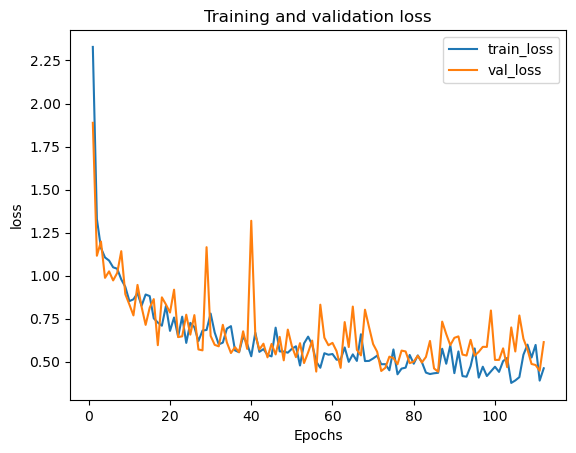

In [25]:
plot_metric(history, 'loss')

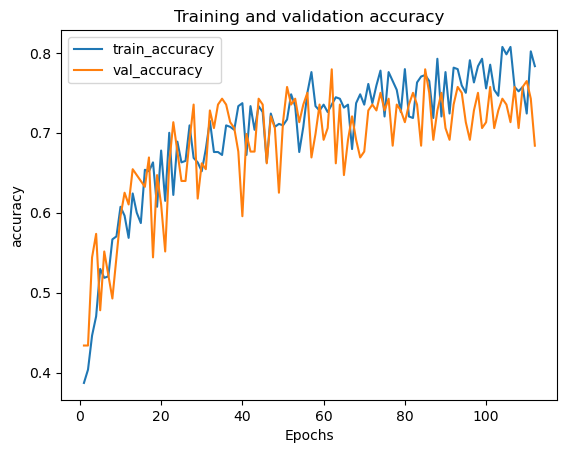

In [26]:
plot_metric(history, 'accuracy')

In [27]:
# === Confusion matrix: true versus predicted values ===
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
nn_confusion_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

In [28]:
nn_confusion_matrix_norm = nn_confusion_matrix.astype('float') / nn_confusion_matrix.sum(axis=1)[:, np.newaxis]     # Normalisation
nn_confusion_matrix_norm = np.around(nn_confusion_matrix_norm, decimals=2)

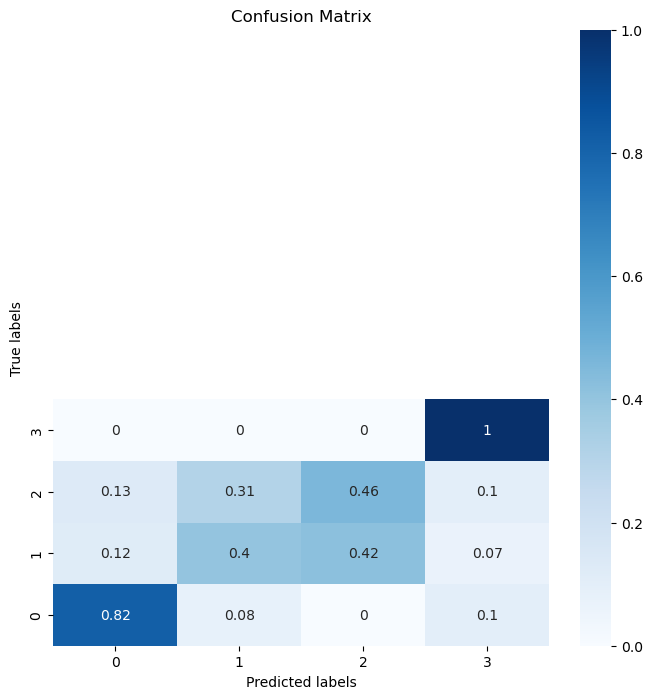

In [29]:
# === plot ===
plt.figure(figsize=(8, 8))
sns.heatmap(nn_confusion_matrix_norm, annot=True, cmap='Blues')

plt.ylim(0, 10)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix'); 
plt.show()